## AE102 Data Analysis and Implementation - Spring 2021
---
### Assignment 03
---
#### Soham S. Phanse, 19D170030
---

In [1]:
# Library Imports

## Basic imports
%matplotlib inline
import numpy as np
import pandas as pd

## Interact functionality imported
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Scipy imports
from scipy.stats import describe as d
from scipy.stats import norm

In [2]:
#import the csv file, pandas will read the file in the dataframe df
df = pd.read_csv('sslc_small.csv', sep=';')

In [3]:
df1 = df['region'].value_counts()

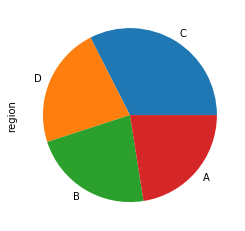

In [4]:
# Pie plot
df1.plot.pie(y='region');

### Box Plots

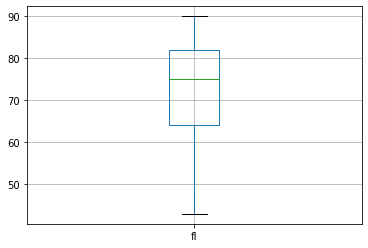

In [5]:
# Trial boxplots for 'fl' of region 'A' in dataframe df
df1 = df[(df.region=='A')]
df.boxplot(column='fl')

In [6]:
# Function box_plot()

## Inputs : name of the region
### Allowed parameters : any string 
### Special parameters : 'all', plots boxplots for all regions, not case sensitive

## Outputs : boxplots of all subject marks

def box_plot(region):
    global store
    if region.lower()=='all':
        store = df['region'].value_counts()
        for each in store.index:
            df1 = df[(df.region==each)]
            df1.boxplot(column=['fl','sl','math','sci','ss'])
    else:
        df1 = df[(df.region == region)]
        df1.boxplot(column=['fl', 'sl', 'math','sci','ss'])
    
#box_plot('A')

In [7]:
df2 = df[(df.region == 'A')]

### ```interact``` in Jupyter

In [8]:
interact(box_plot, region='A')

interactive(children=(Text(value='A', description='region'), Output()), _dom_classes=('widget-interact',))

<function __main__.box_plot(region)>

### Exploring ```DataFrame.corr``` function

In [9]:
storage = df.columns[3:-4]
storage = df[storage]

In [10]:
storage.corr('pearson')

,fl,sl,math,sci,ss
fl,1.000000,0.802033,0.799870,0.817077,0.845586
sl,0.802033,1.000000,0.853155,0.791688,0.834922
math,0.799870,0.853155,1.000000,0.799427,0.807751
sci,0.817077,0.791688,0.799427,1.000000,0.839956
ss,0.845586,0.834922,0.807751,0.839956,1.000000


### Confidence Intervals

#### Approach 1
---
- Here, we assume a normal distribution of the average marks 
- Now, for the next parts of the question we pick up region 'A' and subject 'fl'. 
- We take the confidence interval of 95%
- Before proceeding further we will calculate the true mean and standard deviation of the data of ***fl*** in region ***A***.
- We have sample size of 100.

In [34]:
garage2 = df[df.columns[0:4:3]]
garage3 = garage2[(garage2.region == 'A')]
garage4 = garage3.columns
scores = garage4[-1]

In [21]:
mu = garage3[scores].mean()
var = garage3[scores].var()
std = np.sqrt(var)

By the fundamental definition of confidence intervals in standard normal distributions we have the following results. 

$$ (\bar{x} - z^*\frac{\sigma}{\sqrt{n}} ,\bar{x} + z^*\frac{\sigma}{\sqrt{n}}) \hspace{10pt} Confidence \hspace{2pt} interval$$

Here, $\bar{x}$ is the sample mean. $z^*$ is defined as follows

$$ z^* = \phi^{-1}(1 - \frac{\alpha}{2}) $$

Here, $\phi$ is the Cumulative distribution function of the standard normal distribution. $C$ is the confidence interval in $\%$, in our case we have $C = 95\%$. Also $C = 100(1 - \alpha)\%$. Hence we have $\alpha = 0.05$.

In [22]:
z = norm(0, 1)
alpha = 0.05
z_star = z.ppf(1 - 0.5*alpha) # computes the inverse of the CDF
sample_size = 100 # sample size
sum = 0    

# Compute sample mean
for i in range(sample_size):
    sum = sum + garage3[scores][np.random.randint(len(garage3[scores]))]
sample_mean = sum/sample_size

## Confidence interval
### Lower limit 
l = sample_mean - (z_star*std/np.sqrt(sample_size))

### Upper limit
u = sample_mean + (z_star*std/np.sqrt(sample_size))

### Rouding off for better readability
print('(' + str(l.round(5)) + ','+ str(u.round(5)), ')')

(57.47773,63.88227 )


#### Approach 2
---
- Here, we conduct 1000 experiments. Each experiment consists of 100 samples. 
- We calculate the mean in the each of the experiement and prepare an estimated distribution of these. And then we use the ```np.percentile()```. 

In [23]:
# Compute sample mean for 1 experiment
# define sum = 0
sum = 0

def mean_exp(sample_size=100):
    global sum
    for i in range(sample_size):
        sum = sum + garage3[scores][np.random.randint(len(garage3[scores]))]
    sample_mean = sum/sample_size
    sum = 0
    return sample_mean

means = [] 
# Conduct the whole set of experiments
def exp(number_of_samples=1000, sample_size=100):
    for i in range(number_of_samples):
        means.append(mean_exp(sample_size))

exp()

In [24]:
lower, upper = np.percentile(means, [2.5, 97.5])

In [25]:
print('(' + str(lower.round(5)) + ','+ str(upper.round(5)), ')')

(59.88975,65.96025 )


##### Comparing the values we got from both the approaches

In [26]:
d = {'Approach 1': [l, u], 'Approach 2': [lower, upper]}

In [27]:
df4 = pd.DataFrame(d, index=['Lower', 'Upper'])

In [28]:
print('The comparison between Approach 1 and Approach 2 \n')

The comparison between Approach 1 and Approach 2 



In [30]:
df4

,Approach 1,Approach 2
Lower,57.477726,59.88975
Upper,63.882274,65.96025


In [33]:
print('The true mean is: ' + str(mu.round(3)))

The true mean is: 62.778


### Creating  function ```confidence``` which does everything in 1 shot!

In [89]:
# Sum variables for Approach 1 and 2
suma1, suma2, mean_sum, means = 0, 0, 0, []

def mean_experiment(arr, sample_size = 100):
    global mean_sum
    for i in range(sample_size):
        mean_sum = mean_sum + arr[np.random.randint(len(arr))]
    sample_mean = mean_sum/sample_size
    mean_sum = 0
    return sample_mean

def experiment(arr, sample_size = 100, number_of_samples=1000):
    global means
    for i in range(number_of_samples):
        means.append(mean_experiment(arr, sample_size))
    
# Input :
## Region 
### Default Values : 'A'

## Subject
### Default Value : 'fl'

## Sample Size
### Default Value : 100

## Number of samples 
### Default Value : 1000

## Confidence Level
### Default Value : 95

def confidence(region='A', subject='fl', sample_size=100, number_of_samples=1000, confidence_level = 95):
    
    # Documentation
    print('________________________________________________________________')
    print('These are the parameters which have been initialized by the user \n Region: ' + str(region) + '\n Subject: ' + str(subject) + '\n Sample Size = ' + str(sample_size) + '\n Number of Samples = ' + str(number_of_samples) +  '\n Confidence Level = ' + str(confidence_level) + '\n')
    print('________________________________________________________________')
    
    # Pre-requisite data creation
    if subject.lower() == 'fl':
        if region.lower()=='all':
            s1 = df[df.columns[0:4:3]]
            s3 = s1.columns
            scores = s3[-1]
        
        s1 = df[df.columns[0:4:3]]
        s2 = s1[(s1.region == region)].columns
        s3 = s1[(s1.region == region)]
        scores = s2[-1]    
    
    elif subject.lower() == 'sl':
        if region.lower()=='all':
            s1 = df[df.columns[0:5:4]]
            s3 = s1.columns
            scores = s3[-1]
        
        s1 = df[df.columns[0:5:4]]
        s2 = s1[(s1.region == region)].columns
        s3 = s1[(s1.region == region)]
        scores = s2[-1]
        
    elif subject.lower()=='math':
        if region.lower()=='all':
            s1 = df[df.columns[0:6:5]]
            s3 = s1.columns
            scores = s3[-1]
        
        s1 = df[df.columns[0:6:5]]
        s2 = s1[(s1.region == region)].columns
        s3 = s1[(s1.region == region)]
        scores = s2[-1]
        
    elif subject.lower()=='sci':
        if region.lower()=='all':
            s1 = df[df.columns[0:7:6]]
            s3 = s1.columns
            scores = s3[-1]
        
        s1 = df[df.columns[0:7:6]]
        s2 = s1[(s1.region == region)].columns
        s3 = s1[(s1.region == region)]
        scores = s2[-1]
        
    elif subject.lower()=='ss':
        if region.lower()=='all':
            s1 = df[df.columns[0:8:7]]
            s3 = s1.columns
            scores = s3[-1]
        
        s1 = df[df.columns[0:8:7]]
        s2 = s1[(s1.region == region)].columns
        s3 = s1[(s1.region == region)]
        scores = s2[-1]
        
    # Variable declaration
    global suma1, suma2
    
    # Approach 1
    z = norm(0, 1)
    alpha = 1 - confidence_level/100
    z_star = z.ppf(1 - 0.5*alpha) # computes the inverse of the CDF
    mu = s3[scores].mean()
    var = s3[scores].var()
    std = np.sqrt(var)

    # Compute sample mean
    for i in range(sample_size):
        suma1 = suma1 + s3[scores][np.random.randint(len(s3[scores]))]
    sample_mean = suma1/sample_size
    suma1 = 0

    ## Confidence interval
    ### Lower limit 
    l = sample_mean - (z_star*std/np.sqrt(sample_size))

    ### Upper limit
    u = sample_mean + (z_star*std/np.sqrt(sample_size))
    
    ### Rouding off for better readability
    print('The confidence interval with Approach 1 is (' + str(l.round(5)) + ','+ str(u.round(5)) + ')')
    
    # Approach 2
    experiment(s3[scores], sample_size, number_of_samples)
    
    ## Calculations
    store_val = 0.5*(100 - confidence_level)
    lower, upper = np.percentile(means, [0 + store_val, 100 - store_val])
    print('The confidence interval with Approach 2 is (' + str(lower.round(5)) + ','+ str(upper.round(5))+ ')')
    print('\n\n')
    
    # Comparison DataFrame for better readability
    print('________________________________________________________________')
    d = {'Approach 1': [l, u], 'Approach 2': [lower, upper]}
    df4 = pd.DataFrame(d, index=['Lower', 'Upper'])
    print(df4)
    
confidence()

________________________________________________________________
These are the parameters which have been initialized by the user 
 Region: A
 Subject: fl
 Sample Size = 100
 Number of Samples = 1000
 Confidence Level = 95

________________________________________________________________
The confidence interval with Approach 1 is (61.17773,67.58227)
The confidence interval with Approach 2 is (59.70925,65.70025)



________________________________________________________________
       Approach 1  Approach 2
Lower   61.177726    59.70925
Upper   67.582274    65.70025


### Using interact for better UI

In [90]:
interact(confidence, region='A', subject='fl', sample_size = 100, number_of_samples = 1000, confidence_level = 95)

interactive(children=(Text(value='A', description='region'), Text(value='fl', description='subject'), IntSlide…

<function __main__.confidence(region='A', subject='fl', sample_size=100, number_of_samples=1000, confidence_level=95)>